# Assignment Part 2 '**Detective Vision**'

Detective Vision—the security firm that safeguards some of the city's most important buildings. Recently, one of our high-profile clients reported a series of suspicious activities around their building and parking lot. The client is particularly concerned about certain vehicles that have been seen entering the premises at odd hours.

Your mission is to develop a **Streamlit** application that can quickly identify any car by its **license plate number**.

A user can input any car license number into the Streamlit window, and the output should be the actual car image with the timestamp image indicating when that car enters the building (which is the timestamp of data entry in the database).

Your application could be the key to solving this mystery and ensuring the safety of the building's occupants.

#Setup and Data Collection

### Environment Setup:

Load the following tools into your Python environment: OpenCV, Tesseract OCR, NumPy, and Pandas.
Ensure that each library is fully operational and ready for the mission's tasks ahead.

### Load Data:

You can use the images dataset provided in car_images folder, which contains images with clear views of license plates.
Ensure that this data is correctly loaded and accessible within your environment.

In [1]:
#Environment Setup
# Load libraries
import cv2
import numpy as np
import pandas as pd
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import glob
from ultralytics import YOLO
import statistics as st
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import csv
import time
from datetime import datetime
import streamlit as str
import os
from PIL import Image

In [2]:
image_paths=glob.glob(r'E:\computer vision\PA2_CNN1\PA2\newversion\Images' + "/*")
images=[]

for img_path in image_paths:
      im = cv2.imread(img_path)
      if im is not None:
          images.append(im)
      else:
          print(f"Failed to load {img_path}")

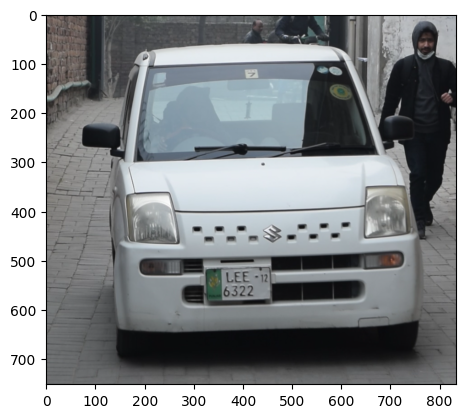

In [4]:
image_rgb = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

#  License Plate Detection: 10 Marks
Now, it's time to dive deeper into the heart of the operation. Your task is to detect and isolate the license plates from the images provided, ensuring that only the most relevant information is extracted for further analysis.

### Plate Detection:

Identify and isolate potential license plate regions from the images.

Implement method for detecting license plates, exploring detection techniques such as Yolo.

In [ ]:
# # Load pre-trained YOLO model (fine-tune with custom dataset if needed)

# dataset = 'E:\computer vision\PA2_CNN1\PA2\license plate.v2i.yolov8/data.yaml'
# backbone = YOLO("yolov8n.pt")
# results = backbone.train(data=dataset, epochs=20)
# success = backbone.export(imgsz=640, format='torchscript', optimize=False, half=False, int8=False) # save the model
# model = torch.jit.load('E:\computer vision\PA2_CNN1\PA2\best.torchscript')  # Use the path to your exported model

In [4]:
def detect_Np(image_path):

  img = cv2.imread(image_path) # Read the image
  results = model(img) # Run YOLO model on the image
  x1, y1, x2, y2 = results[0].boxes[0].xyxy[0].cpu().numpy() # Process YOLO results
  cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2) # Draw rectangle around the detected object
  label = "License Plate"
  cv2.putText(img, f"{label}", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img_rgb,x1, y1, x2, y2

In [5]:
model = YOLO(r'E:\computer vision\PA2_CNN1\PA2\best.torchscript',task='detect')
results = []  # To store results per image

for image_path in image_paths:
    detected_image, x1, y1, x2, y2 = detect_Np(image_path)
    results.append({
        "image_path": image_path,
        "detected_image": detected_image,
        "bbox": (x1, y1, x2, y2)
    })


Loading E:\computer vision\PA2_CNN1\PA2\best.torchscript for TorchScript inference...



0: 640x640 1 2, 886.3ms
Speed: 32.2ms preprocess, 886.3ms inference, 23.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 2, 886.8ms
Speed: 14.0ms preprocess, 886.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 2, 441.9ms
Speed: 11.0ms preprocess, 441.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 2, 208.6ms
Speed: 12.4ms preprocess, 208.6ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 2, 202.7ms
Speed: 10.7ms preprocess, 202.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 2, 203.4ms
Speed: 10.2ms preprocess, 203.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 2, 201.4ms
Speed: 10.5ms preprocess, 201.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 2, 201.5ms
Speed: 10.2ms preprocess, 201.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640

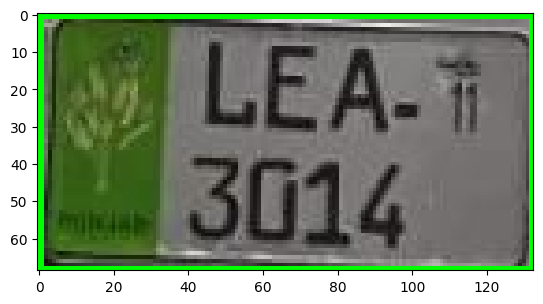

In [6]:
# crop license number plate
def crop_image(img, x1, x2, y1, y2):
  height, width = img.shape[:2]
  x1 = max(0, x1)
  y1 = max(0, y1)
  x2 = min(width, x2)
  y2 = min(height, y2)
  cropped_img = img[y1:y2, x1:x2]
  return cropped_img

cropped_plates = []  # Store cropped plates

for res in results:
    img = res["detected_image"]
    x1, y1, x2, y2 = map(int, res["bbox"])
    cropped_img = crop_image(img, x1, x2, y1, y2)
    cropped_plates.append({
        "image_path": res["image_path"],
        "cropped_plate": cropped_img
    })
for plate in cropped_plates:
    # print(f"Cropped plate from: {plate['image_path']}")
    image_rgb = cv2.cvtColor(plate["cropped_plate"], cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)

# Character Recognition: 15 Marks

With the license plates now isolated, you’re entering the critical phase of the operation. Your mission is to extract the characters from these plates and convert them into readable text. This will require precision and adaptability, as the plates may vary in font and size.

### Character Segmentation:

Break down the detected license plates into individual characters.

**Tasks:**
Segment the detected license plate regions into distinct characters, ensuring that each letter and number is isolated.
Handle variations in fonts and sizes by implementing adaptive thresholding techniques to achieve consistent segmentation results, regardless of plate design.

**Optical Character Recognition (OCR):**

Convert segmented characters into text using a trained convolutional neural network.

**Tasks:**
Utilize the CNN classifier model of **Part 1** to classifiy character of number plate.
Implement error correction mechanisms to address potential misrecognitions.


In [7]:
# helper function for countors identification
def find_contours(dimensions, img):
    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]

    # Check largest 5 or 15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    ii = cv2.imread('contour.jpg')

    x_cntr_list = []
    img_res = []
    widths = []
    heights = []
    contours = []  # Store contour coordinates here

    # Calculate the middle line of the license plate
    middle_line = img.shape[0] // 2

    # Sort contours based on x-coordinate and then on y-coordinate
    sorted_cntrs = sorted(cntrs, key=lambda c: (c[0][0][0], c[0][0][1]))

    # Separate contours above and below the middle line
    above_middle = []
    below_middle = []
    for cntr in sorted_cntrs:
        x, y, w, h = cv2.boundingRect(cntr)

        if y < middle_line:
            above_middle.append((x, y, w, h, cntr))
        else:
            below_middle.append((x, y, w, h, cntr))

    # Sort contours from left to right
    above_middle = sorted(above_middle, key=lambda c: c[0])
    below_middle = sorted(below_middle, key=lambda c: c[0])

    width_margin = 0.85
    height_margin = 0.85
    # Process contours above the middle line
    for x, y, w, h, cntr in above_middle:
        # if w > lower_width and w < upper_width and h > lower_height and h < upper_height:
        if (lower_width * width_margin < w < upper_width / width_margin and
        lower_height * height_margin < h < upper_height / height_margin):
            char = img[y:y+h, x:x+w]
            white_pixels = np.sum(char == 255)
            total_pixels = char.size
            white_percentage = (white_pixels / total_pixels) * 100

            if white_percentage >= 25:
                x_cntr_list.append((x, y))  # stores the (x, y) coordinates of the character's contour
                widths.append(w)
                heights.append(h)
                contours.append((x, y, x+w, y+h))  # Append contour coordinates

                char_copy = np.zeros((44, 24))
                # Extracting each character using the enclosing rectangle's coordinates.
                char = cv2.resize(char, (20, 40))

                cv2.rectangle(ii, (x, y), (x+w, y+h), (50, 21, 200), 2)
                plt.imshow(ii, cmap='gray')

                # Make result formatted for classification: invert colors
                char = cv2.subtract(255, char)

                # Resize the image to 24x44 with a black border
                char_copy[2:42, 2:22] = char
                char_copy[0:2, :] = 0
                char_copy[:, 0:2] = 0
                char_copy[42:44, :] = 0
                char_copy[:, 22:24] = 0
                # print("binary image:")
                # cv2_imshow(char_copy)
                # print("end")

                img_res.append(char_copy)  # List that stores the character's binary image (unsorted)
                # appends L E 1 D 3

    # Process contours below the middle line
    # count=0
    for x, y, w, h, cntr in below_middle:
        if (lower_width * width_margin < w < upper_width / width_margin and
        lower_height * height_margin < h < upper_height / height_margin):
        # if w > lower_width and w < upper_width and h > lower_height and h < upper_height:
            # count+=1
            # print("yo",count)
            char = img[y:y+h, x:x+w]
            white_pixels = np.sum(char == 255)
            total_pixels = char.size
            white_percentage = (white_pixels / total_pixels) * 100

            if white_percentage >= 25:
                x_cntr_list.append((x, y))  # stores the (x, y) coordinates of the character's contour
                widths.append(w)
                heights.append(h)
                contours.append((x, y, x+w, y+h))  # Append contour coordinates

                char_copy = np.zeros((44, 24))
                # Extracting each character using the enclosing rectangle's coordinates.
                char = cv2.resize(char, (20, 40))

                cv2.rectangle(ii, (x, y), (x+w, y+h), (50, 21, 200), 2)
                plt.imshow(ii, cmap='gray')

                # Make result formatted for classification: invert colors
                char = cv2.subtract(255, char)

                # Resize the image to 24x44 with a black border
                char_copy[2:42, 2:22] = char
                char_copy[0:2, :] = 0
                char_copy[:, 0:2] = 0
                char_copy[42:44, :] = 0
                char_copy[:, 22:24] = 0
                # print("binary image:")
                # cv2_imshow(char_copy)
                # print("end")

                img_res.append(char_copy)  # List that stores the character's binary image (unsorted)
                # appends 6 0 0 1

    # Calculate median width and height
    median_width = st.median(widths)
    median_height = st.median(heights)

    # Filter characters based on width and height deviation from the median
    filtered_img_res = []
    filtered_contours = []
    for char, contour in zip(img_res, contours):
        x1, y1, x2, y2 = contour
        if ((x2 - x1) >= 0.70 * median_width) and ((x2 - x1) <= 1.3 * median_width) and ((y2 - y1) >= 0.70 * median_height) and ((y2 - y1) <= 1.3 * median_height):
            filtered_img_res.append(char)
            filtered_contours.append(contour)
            # print("filtered image:")
            # cv2_imshow(char)
            # print("end")
            # appends L E D 3 6 0 0 1

    # Remove contours with a distance of more than 15 pixels between them
    remaining_contours = []
    remaining_filtered_img_res = []
    if len(filtered_contours) > 1:
        center_x = img.shape[1] / 3
        distance = 0
        count = 1
        for i in range(1, len(filtered_contours)):
            if count >= len(filtered_contours):
                break
            x1_prev, _, x2_prev, _ = filtered_contours[count - 1]
            x1_curr, _, x2_curr, _ = filtered_contours[count]
            distance = x1_curr - x2_prev
            # print (f"Distance between contours {count} and {count+1}: {distance}")
            if distance <= -175:
                count += 1
                continue
            elif distance <= 15:
                # print("if (distance <= 15):")
                remaining_contours.append(filtered_contours[count - 1])
                remaining_filtered_img_res.append(filtered_img_res[count - 1])
                count += 1
            elif x1_curr < center_x:
                # print("elif x1_curr < center_x:")
                remaining_contours.append(filtered_contours[count])
                remaining_filtered_img_res.append(filtered_img_res[count])
                count +=2
            elif x1_curr >= (center_x * 2):
                # print("elif x1_curr >= center_x:")
                remaining_contours.append(filtered_contours[count - 1])
                remaining_filtered_img_res.append(filtered_img_res[count - 1])
                count +=2
            else:
                # print("else:")
                remaining_contours.append(filtered_contours[count - 1])
                remaining_filtered_img_res.append(filtered_img_res[count - 1])
                count += 1

        # print("Last contour")
        remaining_contours.append(filtered_contours[-1])
        remaining_filtered_img_res.append(filtered_img_res[-1])

    # plt.show()
    # for img in remaining_filtered_img_res:
    #   print("remaining filtered image:")
    #   cv2_imshow(img)
    #   print("end")

    # returns L E D 6 0 0 1
    return np.array(remaining_filtered_img_res)


In [8]:

# Find characters in the resulting images
def segment_characters(image) :

    # Preprocess cropped license plate image
    LP_HEIGHT=256
    LP_WIDTH = 256
    # resize image
    # code here
    img_resized = cv2.resize(image, (LP_WIDTH, LP_HEIGHT))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    plt.imshow(img_gray)


    # ###
    # img_eq = cv2.equalizeHist(img_gray)
    # img_gray=img_eq
    # # img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
    # # img_binary_lp = cv2.adaptiveThreshold(img_eq, 255,
    # #                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    # #                                   cv2.THRESH_BINARY_INV,
    # #                                   11, 2)
    # ###



    _, img_binary_lp = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel = np.ones((3,3),np.uint8)
    closed_image = cv2.morphologyEx(img_binary_lp, cv2.MORPH_CLOSE, kernel)
    img_binary_lp = closed_image

    # Make borders white
    # code here
    img_binary_lp[0:5, :] = 255  # Top border
    img_binary_lp[:, 0:5] = 255  # Left border
    img_binary_lp[LP_HEIGHT-5:LP_HEIGHT, :] = 255  # Bottom border
    img_binary_lp[:, LP_WIDTH-5:LP_WIDTH] = 255  # Right border
    image_rgb = cv2.cvtColor(img_binary_lp, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/10,
                  2*LP_WIDTH/2.5,
                  LP_HEIGHT/20,
                  2*LP_HEIGHT/2.5]

    cv2.imwrite('contour.jpg', img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)
    # char_list = img_binary_lp

    return char_list

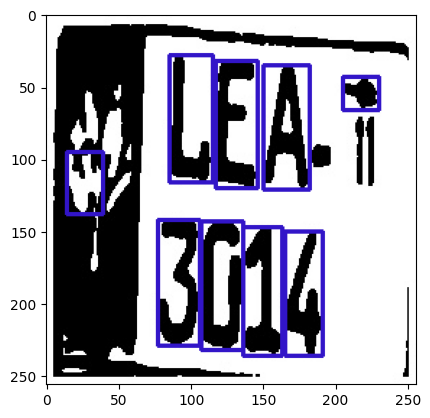

In [9]:
#Test the function
segmented_characters_all = []

for plate in cropped_plates:
    cropped_img = plate['cropped_plate']
    char_images = segment_characters(cropped_img)  # This returns (N, 44, 24)

    segmented_characters_all.append({
        "image_path": plate["image_path"],
        "char_images": char_images
    })

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((28, 28)),  # Smaller size = faster training
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset_path = r'E:\computer vision\PA2_CNN1\PA2\CNN_lp_dataset\train'
train_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
#check how classes are mapped
print(train_dataset.class_to_idx)

test_dataset_path = r'E:\computer vision\PA2_CNN1\PA2\CNN_lp_dataset\val'
test_dataset = datasets.ImageFolder(root=test_dataset_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

{'class_0': 0, 'class_1': 1, 'class_2': 2, 'class_3': 3, 'class_4': 4, 'class_5': 5, 'class_6': 6, 'class_7': 7, 'class_8': 8, 'class_9': 9, 'class_A': 10, 'class_B': 11, 'class_C': 12, 'class_D': 13, 'class_E': 14, 'class_F': 15, 'class_G': 16, 'class_H': 17, 'class_I': 18, 'class_J': 19, 'class_K': 20, 'class_L': 21, 'class_M': 22, 'class_N': 23, 'class_O': 24, 'class_P': 25, 'class_Q': 26, 'class_R': 27, 'class_S': 28, 'class_T': 29, 'class_U': 30, 'class_V': 31, 'class_W': 32, 'class_X': 33, 'class_Y': 34, 'class_Z': 35}


In [12]:
class CharCNN(nn.Module):
    def __init__(self, num_classes=36):  # 0-9 and A-Z = 36 classes
        super(CharCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # Input = 1 channel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [1,28,28] → [32,14,14]
        x = self.pool(F.relu(self.conv2(x)))  # [32,14,14] → [64,7,7]
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
model = CharCNN(num_classes=36).to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# epochs = 10
# for epoch in range(epochs):
#     model.train()
#     running_loss = 0.0

#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()

#     print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss/len(train_loader):.4f}")


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

target_names = list(train_dataset.class_to_idx.keys())
report = classification_report(all_labels, all_preds, output_dict=True)

accuracy = accuracy_score(all_labels, all_preds)
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1 = report['macro avg']['f1-score']
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision (Macro Avg): {precision * 100:.2f}%")
print(f"Recall (Macro Avg): {recall * 100:.2f}%")
print(f"F1-Score (Macro Avg): {f1 * 100:.2f}%")
# torch.save(model.state_dict(), '/content/drive/MyDrive/pa2/char_cnn.pth')



Accuracy: 98.90%
Precision (Macro Avg): 99.09%
Recall (Macro Avg): 99.10%
F1-Score (Macro Avg): 99.06%


In [13]:
model = CharCNN()
model.load_state_dict(torch.load(r'E:\computer vision\PA2_CNN1\PA2\char_cnn.pth'))
model.eval()

CharCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=36, bias=True)
)

In [19]:
def fix_dimension(img):
    img = cv2.resize(img, (28, 28))  # Resize to model input size
    return img


def show_results(model, char_images, idx_to_class, device='cpu'):
    model.eval()
    output = []

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Match training preprocessing
    ])

    with torch.no_grad():
        for img in char_images:
            img = fix_dimension(img)

            if img.max() <= 1:
                img = (img * 255).astype(np.uint8)

            if len(img.shape) == 2:  # (H, W)
                img = np.expand_dims(img, axis=-1)  # (H, W, 1)

            img_tensor = transform(img)
            img_tensor = img_tensor.unsqueeze(0).float().to(device)

            # Predict
            logits = model(img_tensor)
            _, pred = torch.max(logits, dim=1)
            pred_char = idx_to_class[pred.item()][-1]
            output.append(pred_char)

    return ''.join(output)
# Invert the class_to_idx mapping once
idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

predicted_plates = []

for item in segmented_characters_all:
    image_path = item["image_path"]
    char_images = item["char_images"]

    if len(char_images) == 0:
        plate_text = "[NO CHARACTERS FOUND]"
    else:
        plate_text = show_results(model, char_images, idx_to_class, device=device)

    predicted_plates.append({
        "image_path": image_path,
        "plate_text": plate_text
    })
for pred in predicted_plates:
    # cv2_imshow(cv2.imread(pred['image_path']))
    print(f"{pred['image_path']} => {pred['plate_text']}")




E:\computer vision\PA2_CNN1\PA2\newversion\Images\2024-01-30_17-41.png => LEE6322
E:\computer vision\PA2_CNN1\PA2\newversion\Images\2024-01-30_18-08.png => AMW882
E:\computer vision\PA2_CNN1\PA2\newversion\Images\2024-01-30_18-54.png => LED6001
E:\computer vision\PA2_CNN1\PA2\newversion\Images\DSC_0968.JPG => LEA1856
E:\computer vision\PA2_CNN1\PA2\newversion\Images\DSC_0969.JPG => M35
E:\computer vision\PA2_CNN1\PA2\newversion\Images\DSC_0971.JPG => [NO CHARACTERS FOUND]
E:\computer vision\PA2_CNN1\PA2\newversion\Images\DSC_0973.JPG => MND464
E:\computer vision\PA2_CNN1\PA2\newversion\Images\DSC_0977.JPG => LEF2640
E:\computer vision\PA2_CNN1\PA2\newversion\Images\DSC_0979.JPG => BRA1408
E:\computer vision\PA2_CNN1\PA2\newversion\Images\DSC_0982.JPG => LEB1194
E:\computer vision\PA2_CNN1\PA2\newversion\Images\DSC_0984.JPG => LEC1482
E:\computer vision\PA2_CNN1\PA2\newversion\Images\DSC_0989.JPG => LE9088
E:\computer vision\PA2_CNN1\PA2\newversion\Images\DSC_0990.JPG => MMA5007
E:\comp

# Logging: 10 Marks

With the license plates successfully recognized, it’s time to finalize the operation by logging the critical information.

**Tasks:**

### Extract Timestamps:
**Objective:**
Identify and log the specific time and image label.

**Tasks:**
Develop a method to extract the image label and the timestamp corresponding to each detected license plate (time when entry was created in the database).
Ensure this information is accurately logged and associated with the correct license plate number for easy retrieval and reporting.



In [23]:
image_paths2=glob.glob(r'E:\computer vision\PA2_CNN1\PA2\newversion\Images' + "/*")
model = YOLO(r'E:\computer vision\PA2_CNN1\PA2\best.torchscript', task='detect')

def log_license_plate_info(image_path, license_plate_number, log_file=r'E:\computer vision\PA2_CNN1\PA2\newversion\license_plate_log.csv'):
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    image_label = image_path.split('\\')[-1]

    with open(log_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([license_plate_number, image_label, timestamp])
        print(f"Logged: {license_plate_number}, {image_label}, {timestamp}")

def process_images_from_directory():
    for pred in predicted_plates:
      log_license_plate_info(pred['image_path'], pred['plate_text'])

process_images_from_directory()

Logged: LEE6322, 2024-01-30_17-41.png, 2025-06-25 16:40:46
Logged: AMW882, 2024-01-30_18-08.png, 2025-06-25 16:40:46
Logged: LED6001, 2024-01-30_18-54.png, 2025-06-25 16:40:46
Logged: LEA1856, DSC_0968.JPG, 2025-06-25 16:40:46
Logged: M35, DSC_0969.JPG, 2025-06-25 16:40:46
Logged: [NO CHARACTERS FOUND], DSC_0971.JPG, 2025-06-25 16:40:46
Logged: MND464, DSC_0973.JPG, 2025-06-25 16:40:46
Logged: LEF2640, DSC_0977.JPG, 2025-06-25 16:40:46
Logged: BRA1408, DSC_0979.JPG, 2025-06-25 16:40:46
Logged: LEB1194, DSC_0982.JPG, 2025-06-25 16:40:46
Logged: LEC1482, DSC_0984.JPG, 2025-06-25 16:40:46
Logged: LE9088, DSC_0989.JPG, 2025-06-25 16:40:46
Logged: MMA5007, DSC_0990.JPG, 2025-06-25 16:40:46
Logged: LEA8999, DSC_0992.JPG, 2025-06-25 16:40:46
Logged: FSA5750, DSC_0994.JPG, 2025-06-25 16:40:46
Logged: BRK1500, DSC_0996.JPG, 2025-06-25 16:40:46
Logged: MNA486, DSC_0997.JPG, 2025-06-25 16:40:46
Logged: MM4708, DSC_0998.JPG, 2025-06-25 16:40:46
Logged: MNF281, DSC_1006.JPG, 2025-06-25 16:40:46
Log

#Streamlit Integration and Safe City Deployment: 15 Marks

Agent, your final task is to integrate all your hard work into a user-friendly application that can be deployed in the real world. With Safe City cameras employed everywhere, your Streamlit application will play a crucial role in maintaining security across the city. This mission will require you to develop a streamlined web application that automatically recognizes license plates from uploaded images and logs the data for easy access and analysis.

**Tasks:**

### Streamlit Web Application Development:

Create a simple, yet effective, web application using Streamlit that integrates your previous work into a cohesive system.

Develop a Streamlit application allowing users to enter car license numbers and generate car images with corresponding timestamps.



In [113]:
# Constants
LOG_FILE = '/content/drive/MyDrive/pa2/license_plate_log.csv'  # Path to your CSV log
IMAGES_DIR = '/content/drive/MyDrive/pa2/Images'              # Folder where images are stored

st.title("🔎 License Plate Lookup")

# Load the CSV log
@st.cache_data
def load_log():
    try:
        return pd.read_csv(LOG_FILE, names=["Plate", "Image", "Timestamp"])
    except FileNotFoundError:
        st.error("Log file not found.")
        return pd.DataFrame(columns=["Plate", "Image", "Timestamp"])

log_df = load_log()

# User input
search_plate = st.text_input("Enter License Plate Number (e.g., BFM731):").strip().upper()

if search_plate:
    results = log_df[log_df["Plate"] == search_plate]

    if not results.empty:
        for _, row in results.iterrows():
            st.write(f"📅 **Timestamp:** {row['Timestamp']}")
            image_path = os.path.join(IMAGES_DIR, row["Image"])
            if os.path.exists(image_path):
                st.image(Image.open(image_path), caption=f"Matched Image: {row['Image']}", use_column_width=True)
            else:
                st.warning(f"Image `{row['Image']}` not found.")
    else:
        st.error("No matching plate found.")

2025-06-25 10:48:33.910 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:48:34.055 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-25 10:48:34.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:48:34.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:48:34.060 No runtime found, using MemoryCacheStorageManager
2025-06-25 10:48:34.063 No runtime found, using MemoryCacheStorageManager
2025-06-25 10:48:34.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:48:34.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:48:34.069 T

In [114]:
log_df = pd.read_csv("/content/drive/MyDrive/pa2/license_plate_log.csv")
print(log_df.head())

   [NO DETECTION]                      toyota-vitz-2007-96143941.jpg  \
0  [NO DETECTION]                      toyota-vitz-2007-96143941.jpg   
1          AMW882  /content/drive/MyDrive/pa2/Images/2024-01-30_1...   
2          LE2542  /content/drive/MyDrive/pa2/Images/suzuki-mehra...   
3         LEE6322  /content/drive/MyDrive/pa2/Images/2024-01-30_1...   
4          AMS220  /content/drive/MyDrive/pa2/Images/tn_toyota-fo...   

   2025-06-25 09:13:08  
0  2025-06-25 09:14:42  
1  2025-06-25 09:19:28  
2  2025-06-25 09:19:28  
3  2025-06-25 09:19:28  
4  2025-06-25 09:19:28  


# Assessment Criteria: Operation Detective Vision

As you complete the mission, your work will be assessed based on the following key criteria:

## Technical Competence:

**Effectiveness:** How well does your system perform in terms of recognizing and logging license plates? Are the results accurate and reliable?

**Integration:** How seamlessly have you integrated all components of the project into the final Streamlit application? Is the user interface intuitive and user-friendly?
